### Chapter 4. Dynamic Programming

A program to simulate and calculate the example of a random policy in a small grid

In [ ]:
import numpy as np
from tqdm import tqdm

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
import random

### Policy iteration

#### Parameters

In [ ]:
gamma = 1 # discounting rate
rewardSize = -1
gridSize = 4
terminationStates = [[0,0], [gridSize-1, gridSize-1]]
actions = [[-1, 0], [1, 0], [0, 1], [0, -1]]
numIterations = 1000

#### Help functions

In [ ]:
def actionRewardFunction(initialPosition, action):
    
    if initialPosition in terminationStates:
        return initialPosition, 0
    
    reward = rewardSize
    finalPosition = np.array(initialPosition) + np.array(action)
    if -1 in finalPosition or 4 in finalPosition: 
        finalPosition = initialPosition
        
    return finalPosition, reward


#### Initialization -- states, value of functions

In [ ]:
valueMap = np.zeros((gridSize, gridSize))
states = [[i, j] for i in range(gridSize) for j in range(gridSize)]

In [ ]:
# values of the value function at step 0 - initial values
valueMap

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

#### Policy evaluation

In [ ]:
deltas = []
for it in range(numIterations):
    copyValueMap = np.copy(valueMap)
    deltaState = []
    for state in states:
        weightedRewards = 0
        for action in actions:
            finalPosition, reward = actionRewardFunction(state, action)
            weightedRewards += (1/len(actions))*(reward+(gamma*valueMap[finalPosition[0], finalPosition[1]]))
        deltaState.append(np.abs(copyValueMap[state[0], state[1]]-weightedRewards))
        copyValueMap[state[0], state[1]] = weightedRewards
    deltas.append(deltaState)
    valueMap = copyValueMap
    if it in [0,1,2,9, 99, numIterations-1]:
        print("Iteration {}".format(it+1))
        print(valueMap)
        print("")

Iteration 1
[[ 0. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1.  0.]]

Iteration 2
[[ 0.   -1.75 -2.   -2.  ]
 [-1.75 -2.   -2.   -2.  ]
 [-2.   -2.   -2.   -1.75]
 [-2.   -2.   -1.75  0.  ]]

Iteration 3
[[ 0.     -2.4375 -2.9375 -3.    ]
 [-2.4375 -2.875  -3.     -2.9375]
 [-2.9375 -3.     -2.875  -2.4375]
 [-3.     -2.9375 -2.4375  0.    ]]

Iteration 10
[[ 0.         -6.13796997 -8.35235596 -8.96731567]
 [-6.13796997 -7.73739624 -8.42782593 -8.35235596]
 [-8.35235596 -8.42782593 -7.73739624 -6.13796997]
 [-8.96731567 -8.35235596 -6.13796997  0.        ]]

Iteration 100
[[  0.         -13.94260509 -19.91495107 -21.90482522]
 [-13.94260509 -17.92507693 -19.91551999 -19.91495107]
 [-19.91495107 -19.91551999 -17.92507693 -13.94260509]
 [-21.90482522 -19.91495107 -13.94260509   0.        ]]

Iteration 1000
[[  0. -14. -20. -22.]
 [-14. -18. -20. -20.]
 [-20. -20. -18. -14.]
 [-22. -20. -14.   0.]]



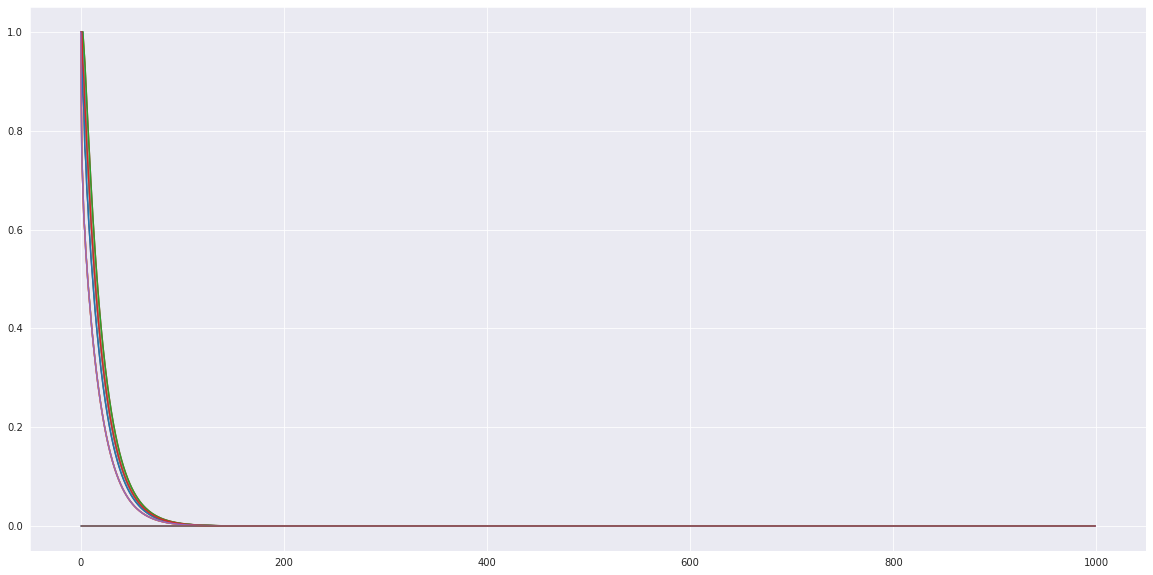

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(deltas)